In [38]:
"""
Brachistochrone Problem - Unconstrained
    A bead is set on a wire that defines the path that we can shape
    The bead starts at some y-position h with zero velocity. Initial starting
    point at x = 0. Endpoints are fixed. The wire is discretized uniformly with n points
"""
import numpy as np
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt
np.set_printoptions(precision=3)

In [39]:
# given parameters
x0 = (0,1) # starting point
xf = (1,0) # ending point
mu_k = 0.3
g = 9.81

h = x0[1] # initial height

In [40]:
# Define objective function
def delta_t(x, y, x_1, y_1):
    # speed between two points
    dy = y_1 - y
    dx = x_1 - x
    return np.sqrt(dx**2 + dy**2) / \
        (np.sqrt(h - y_1 - mu_k*x_1) + np.sqrt(h - y - mu_k*x))
    
def f(y_vector, args):
    x_vec = args
    # Objective function
    x, y = x_vec[1], y_vector[0]
    sum = delta_t(*x0, x, y)

    for i in range(1, len(y_vector)):
        x_1, y_1 = x_vec[i+1], y_vector[i]
        sum += delta_t(x, y, x_1, y_1)
        x, y = x_1, y_1
    
    sum += delta_t(x, y, *xf)
    return sum

In [41]:
# Optimization Helper Functions
def get_opt_params(n):
    # input is number of points in discretization
    # output are the x and y vectors for running the optimization
    x_vec = np.linspace(x0[0], xf[0], n) # uniform spacing for x points
    y0 = [0]*(n-2)   
    return x_vec, y0

def see_results(x_vec, res, total_time, plot):
    print(f'Results for n={len(x_vec)} discretization points')
    y_opt = res.x
    y_opt_rounded = [round(elem, 3) for elem in y_opt]
    
    # Get Optimization Data
    travel_time = np.sqrt(2/g) * f(y_opt, x_vec)
    print(f"Travel time: {travel_time:.5f} s, function Evaluations: {res.nfev}, total iterations: {res.nit}, wall time: {total_time:.4} s")
    
    if plot: # Verbose debugging helper
        print(f"X values are: {x_vec}")
        print(f"The optimal y values are: {y_opt_rounded}")
        y_plot = [x0[1], *y_opt, xf[1]]
        plt.plot(x_vec, y_plot, '-bo')
        plt.show()

    print()
    return travel_time

def plot_curve(x, y_opt, fig):
    # plot the curve
    y_plot = [x0[1], *y_opt, xf[1]]
    plt.plot(x, y_plot, '-bo')

def run_brachistochrone(n=12, plot=False):
# run optimization for brachistochrone problem with n discretization points
    x_vec, y0 = get_opt_params(n)
    start = time.time()
    res = minimize(f, y0, args=x_vec, tol=1e-6)
    end = time.time()
    total_time = end - start
    travel_time = see_results(x_vec, res, total_time, plot)
    return res.x, x_vec, total_time, res.nit, res.nfev, travel_time

In [43]:
# Cold Start
y_opt4, x_vec4, t4, it4, fev4, tt4 = run_brachistochrone(4)
y_opt8, x_vec8, t8, it8, fev8, tt8 = run_brachistochrone(8)
y_opt16, x_vec16, t16, it16, fev16, tt16 = run_brachistochrone(16)
y_opt32, x_vec32, t32, it32, fev32, tt32 = run_brachistochrone(32)
y_opt64, x_vec64, t64, it64, fev64, tt64 = run_brachistochrone(64)
y_opt128, x_vec128, t128, it128, fev128, tt128 = run_brachistochrone(128)

Results for n=4 discretization points
Travel time: 0.65355 s, function Evaluations: 24, total iterations: 6, wall time: 0.006978 s

Results for n=8 discretization points
Travel time: 0.63536 s, function Evaluations: 112, total iterations: 13, wall time: 0.01952 s

Results for n=16 discretization points
Travel time: 0.62852 s, function Evaluations: 405, total iterations: 25, wall time: 0.1645 s

Results for n=32 discretization points
Travel time: 0.62532 s, function Evaluations: 1488, total iterations: 43, wall time: 0.7242 s

Results for n=64 discretization points
Travel time: 0.62366 s, function Evaluations: 8013, total iterations: 79, wall time: 7.2 s

Results for n=128 discretization points
Travel time: 0.62275 s, function Evaluations: 22490, total iterations: 148, wall time: 33.28 s



Text(0, 0.5, 'Function Evaluations')

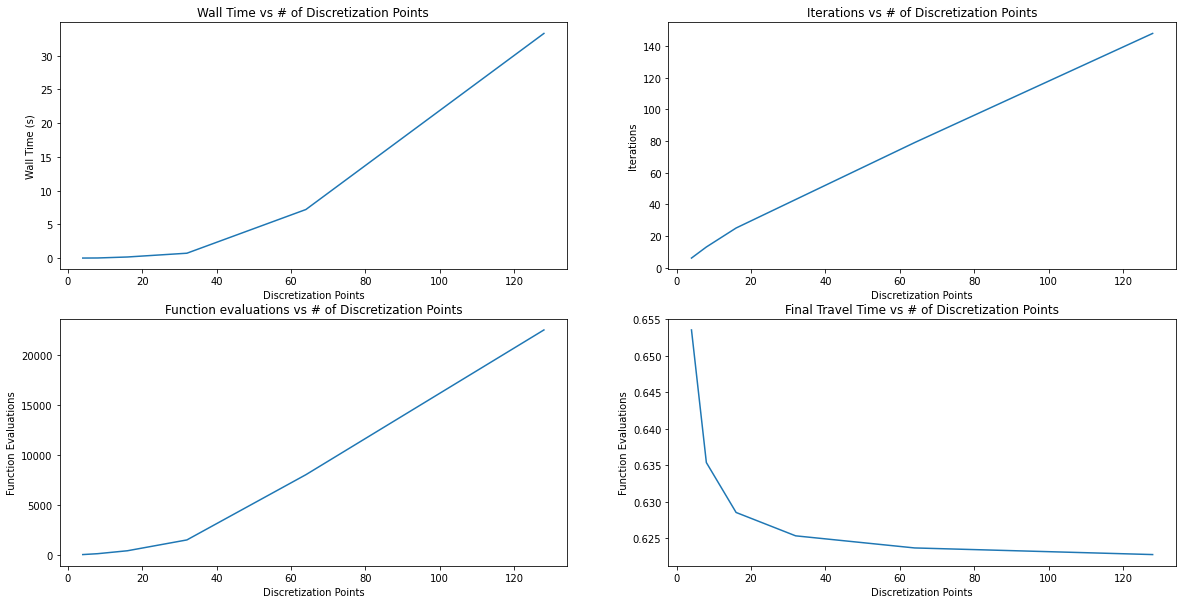

In [47]:
# Cold Start Plots
num_points = [4, 8, 16, 32, 64, 128]

t = [t4, t8, t16, t32, t64, t128]
it = [it4, it8, it16, it32, it64, it128]
fe = [fev4, fev8, fev16, fev32, fev64, fev128]
tt = [tt4, tt8, tt16, tt32, tt64, tt128]

plt.rcParams['figure.figsize'] = [20,10]

plt.subplot(221)
plt.plot(num_points, t)
plt.title('Wall Time vs # of Discretization Points')
plt.xlabel('Discretization Points')
plt.ylabel("Wall Time (s)")

plt.subplot(222)
plt.plot(num_points, it)
plt.title('Iterations vs # of Discretization Points')
plt.xlabel('Discretization Points')
plt.ylabel("Iterations")

plt.subplot(223)
plt.plot(num_points, fe)
plt.title('Function evaluations vs # of Discretization Points')
plt.xlabel('Discretization Points')
plt.ylabel("Function Evaluations")

plt.subplot(224)
plt.plot(num_points, tt)
plt.title('Final Travel Time vs # of Discretization Points')
plt.xlabel('Discretization Points')
plt.ylabel("Function Evaluations")

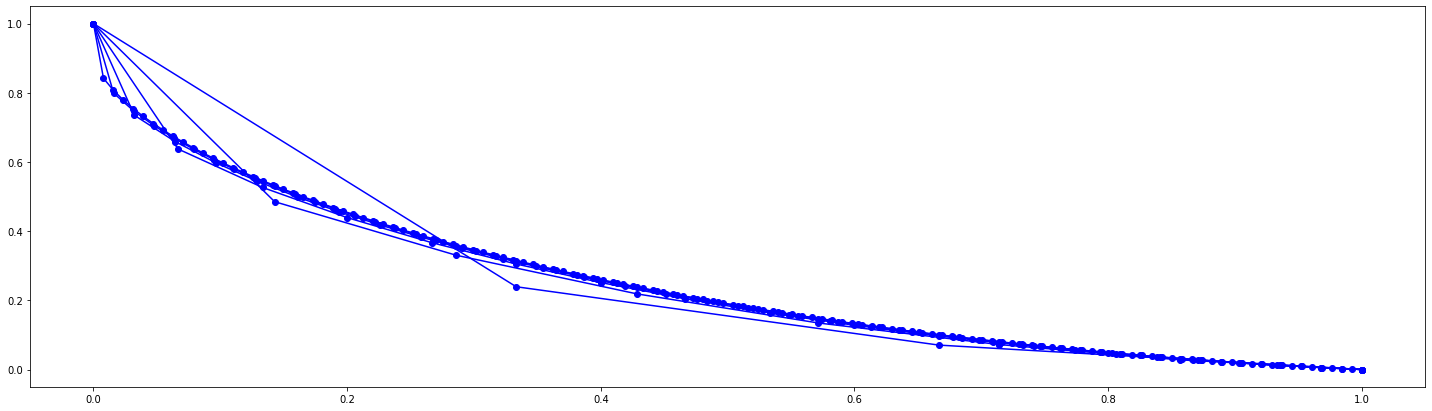

In [45]:
# Visualize paths
x_opts = [x_vec4, x_vec8, x_vec16, x_vec32, x_vec64, x_vec128]
y_opts = [y_opt4, y_opt8, y_opt16, y_opt32, y_opt64, y_opt128]

fig = plt.figure()
for i in range(len(x_opts)):
    plot_curve(x_opts[i], y_opts[i], fig)
plt.show()